Name: Joshua Lindsey
Date: 2025/05/17
Project Name: ML - Heart Disease prediction Using Logistic Regression
Source: https://www.geeksforgeeks.org/ml-heart-disease-prediction-using-logistic-regression/

In [23]:
# Step 1: Imports
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Step 2: Data Preparation

# The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). 
# Data includes over 4,000 records and 15 attributes

disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace=True, axis = 1)
disease_df.rename(columns = {'male':"Sex_male"}, inplace=True)

# Handling missing data

disease_df.dropna(axis=0, inplace=True)
disease_df.head()


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [13]:
# Step 3: Splitting the Datset into test and train sets

x = np.asarray(disease_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y = np.asarray(disease_df['TenYearCHD'])

x = preprocessing.StandardScaler().fit(x).transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=4)

print("Train Set: ", x_train.shape, y_train.shape)
print("Test Set: ", x_test.shape, y_test.shape)

Train Set:  (2625, 6) (2625,)
Test Set:  (1126, 6) (1126,)


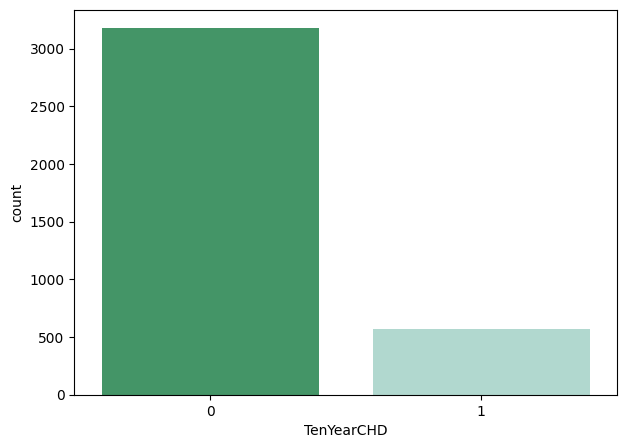

In [14]:
# Step 4: Exploratory Data Analysis (EDA)

# perform EDA on the dataset to understand and gain insights into the dataset before building a predictive model for heart disease

plt.figure(figsize=(7,5))
sns.countplot(x="TenYearCHD", data=disease_df, palette="BuGn_r")
plt.show()

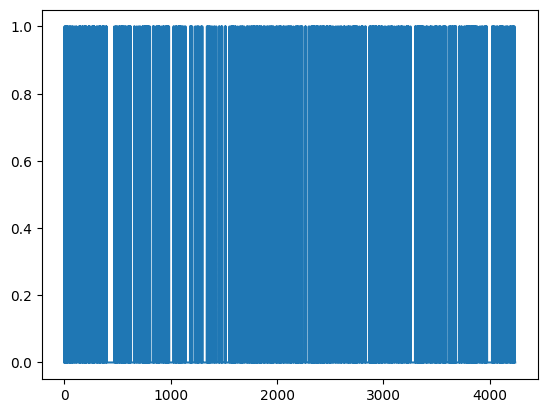

In [16]:
# Count plot show a high imbalance in the dataset where the majority of individuals do NOT have heart disease, with label 0, while only a small number, 500, have heart disease, with label 1. 

# Counting number of patients affected by CHD, blue - adsence of heart disease, white - presence of heart disease

laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [18]:
# Step 5: Fitting Logistic Regression Model for Heart Disease Prediction

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [22]:
# Step 6: Evaluating Logistic Regression Model

print("Accuracy of the model is = {:.4f}%".format(accuracy_score(y_test, y_pred)))

Accuracy of the model is = 0.8490%


The details for confusion matris is: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



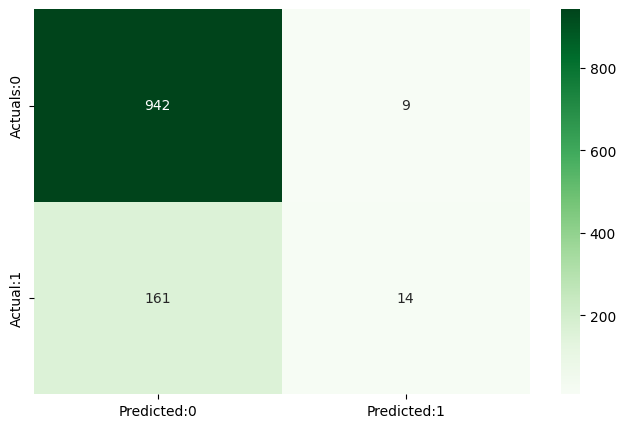

In [25]:
# Confusion Matrix

# Confusion matrix is a performance evaluation tool used to assess the accuracy of a classification model. It is used to evaluate the performance of our logistic regression model in
# predicting heart disease helping us understand how well the model distinguishes between positive and negative cases.

print("The details for confusion matris is: ")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actuals:0','Actual:1'])

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Greens')
plt.show()


The model performs well at predicting no heart disease (Class 0) but poorly predicts heart disease (Class 1) result in an imbalanced classification performance. To enhance model performance techniques such as class balancing, adjust thresholds or experiment with different algorithms help to achieve better results to correctly identify individuals with heart disease. 